## Session #2 Homework

### Dataset

In this homework, we will use the California Housing Prices. You can take it from
[Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [2]:
df = pd.read_csv('./housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


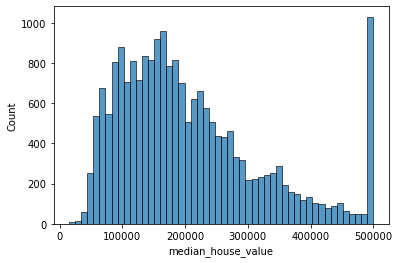

In [4]:
sns.histplot(df['median_house_value'], bins=50);

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [5]:
# Dropping 'ocean_proximity' column (categorical variable)
df.drop(columns=['ocean_proximity'], inplace=True)

### Question 1
Find a feature with missing values. How many missing values does it have?

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'population'?

In [7]:
df['population'].median()

1166.0

### Split the data

* Shuffle the initial dataset, use seed `42`.

In [8]:
idx = df.index.values
np.random.seed(42)
np.random.shuffle(idx)
df = df.iloc[idx]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9337,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
20253,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
12117,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3304,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
13685,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [9]:
n = df.shape[0]
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val ,n_test)

20640 12384 4128 4128


* Make sure that the target value ('median_house_value') is not in your dataframe.

In [10]:
X = df.drop(columns='median_house_value')
y = df['median_house_value']

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

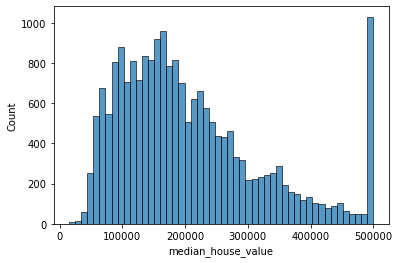

In [11]:
sns.histplot(y, bins=50)

* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

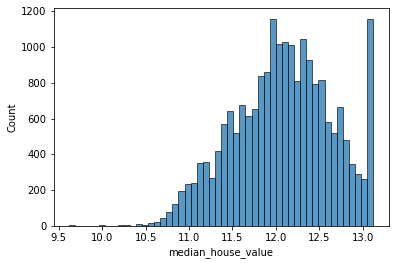

In [12]:
y = np.log1p(y)
sns.histplot(y, bins=50)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- With median
- Both are equally good

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?